In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns   

test.csv files have multivariate time series data and test_labels.csv labels files have time stamps of anomaly regions.

   Write python code for the following tasks

   a) Read test and label files

   b) Draw time series plots with anomaly regions 

   c) Perform EDA and find out root cause
   
   d) Find out the variables which are the root cause for the anomaly 


1. Read test and label files 

In [2]:
msl_test = pd.read_csv('./files/msl_test.csv')
psm_test = pd.read_csv('./files/psm_test.csv')
smap_test = pd.read_csv('./files/smap_test.csv')
test = pd.read_csv('./files/test.csv')

In [3]:
msl_test.head()

0  1  2  3  4  5  6  7  8  9  ...  45  46  47  48  49  50  51  52  \
0 -0.946958  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
1 -0.942278  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
2 -0.936037  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
3 -0.923557  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
4 -0.917317  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   

   53  54  
0   0   0  
1   0   0  
2   0   0  
3   0   0  
4   0   0  

[5 rows x 55 columns]

In [4]:
psm_test.head()

timestamp_(min)  feature_0  feature_1  feature_2  feature_3  feature_4  \
0         132480.0   0.775374   0.909185   0.606704   0.660626   0.449968   
1         132481.0   0.775423   0.909142   0.607796   0.660655   0.487813   
2         132482.0   0.775458   0.909004   0.607988   0.660623   0.469532   
3         132483.0   0.775513   0.909200   0.607218   0.660640   0.459910   
4         132484.0   0.775587   0.909318   0.606654   0.660643   0.462155   

   feature_5  feature_6  feature_7  feature_8  ...  feature_15  feature_16  \
0   0.426717   0.471591   0.434668   0.479511  ...    0.400617    0.480444   
1   0.442545   0.505682   0.448640   0.499451  ...    0.396902    0.500213   
2   0.433682   0.477273   0.450906   0.487223  ...    0.389270    0.487982   
3   0.435581   0.482955   0.454683   0.490431  ...    0.403780    0.491253   
4   0.436214   0.477273   0.449396   0.494671  ...    0.403636    0.495947   

   feature_17  feature_18  feature_19  feature_20  feature_21  feature_22  \
0    0.588670    0.404036    0.638957    0.020236    0.042705    0.173375   
1    0.587041    0.421605    0.637865    0.018550    0.042705    0.191826   
2    0.582404    0.407393    0.636091    0.018550    0.039146    0.188361   
3    0.584660    0.407141    0.638138    0.020236    0.042705    0.186975   
4    0.581527    0.402761    0.632678    0.021922    0.042705    0.156325   

   feature_23  feature_24  
0    0.008715    0.105991  
1    0.010893    0.110599  
2    0.010893    0.115207  
3    0.013072    0.110599  
4    0.008715    0.110599  

[5 rows x 26 columns]

In [5]:
smap_test.head()

0    1    2    3    4    5    6    7    8    9  ...   15   16   17   18  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    19   20   21   22   23   24  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  1.0  1.0  0.0  0.0  

[5 rows x 25 columns]

In [6]:
test.head()

0         1         2         3    4         5         6    7         8  \
0  0.0  0.000340  0.000432  0.000000  0.0  0.694290  0.038316  0.0  0.000000   
1  0.0  0.000510  0.000576  0.000000  0.0  0.694702  0.038856  0.0  0.427536   
2  0.0  0.000510  0.000576  0.000000  0.0  0.694908  0.038856  0.0  0.000000   
3  0.0  0.000170  0.000432  0.000000  0.0  0.695114  0.038856  0.0  0.007246   
4  0.0  0.000935  0.000720  0.000336  0.0  0.695733  0.039935  0.0  0.000000   

     9  ...   28    29        30        31   32        33        34        35  \
0  0.0  ...  0.0  0.50  0.036442  0.000000  0.0  0.023256  0.055147  0.055147   
1  0.0  ...  0.0  0.25  0.025862  0.000000  0.0  0.028623  0.040441  0.040441   
2  0.0  ...  0.0  0.25  0.307994  0.013699  0.0  0.026834  0.183824  0.180147   
3  0.0  ...  0.0  0.25  0.026254  0.000000  0.0  0.030411  0.047794  0.047794   
4  0.0  ...  0.0  0.25  0.014107  0.000000  0.0  0.028623  0.033088  0.029412   

    36   37  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 38 columns]

In [7]:
msl_test_label = pd.read_csv('./files/msl_test_label.csv')
psm_test_label = pd.read_csv('./files/psm_test_label.csv')
smap_test_label = pd.read_csv('./files/smap_test_label.csv')
test_label = pd.read_csv('./files/test_label.csv')

In [8]:
msl_test_label.head()

0
0  0
1  0
2  0
3  0
4  0

In [9]:
smap_test_label.head()

0
0  0
1  0
2  0
3  0
4  0

In [10]:
psm_test_label.head()

timestamp_(min)  label
0         132480.0      0
1         132481.0      0
2         132482.0      0
3         132483.0      0
4         132484.0      0

In [11]:
test_label.head()

0
0  0
1  0
2  0
3  0
4  0

2. Draw time series plots with anamoly regions

In [12]:
test.shape

(70001, 38)

In [13]:
for i in range(38):
    print(f"Column {i}: Min value: {test.iloc[:, i].min()}, Max value: {test.iloc[:, i].max()} Unique values: {test.iloc[:, i].unique()}")

Column 0: Min value: 0.0, Max value: 1.0 Unique values: [0.       0.010101 0.020202 0.030303 0.060606 0.040404 0.545455 1.
 0.808081 0.080808 0.090909 0.131313 0.050505 0.848485 0.434343 0.393939
 0.111111 0.121212 0.151515 0.070707 0.222222 0.212121 0.20202  0.191919
 0.181818 0.171717 0.161616 0.242424 0.232323 0.262626 0.282828 0.252525
 0.272727 0.292929 0.343434 0.333333 0.363636 0.30303  0.313131 0.323232
 0.353535 0.141414 0.10101  0.373737 0.40404  0.464646 0.494949 0.383838
 0.414141 0.424242 0.474747 0.454545 0.505051 0.484848 0.444444 0.515152
 0.525253 0.535354 0.555556 0.707071 0.939394 0.969697 0.929293 0.979798
 0.959596 0.989899 0.949495 0.909091 0.818182 0.443299 0.453608 0.43299
 0.484536 0.463918 0.42268  0.474227 0.412371 0.402062 0.391753 0.371134
 0.381443 0.360825 0.350515 0.340206 0.319588 0.309278 0.329897 0.28866
 0.298969 0.278351 0.268041 0.247423 0.257732 0.226804 0.237113 0.206186
 0.195876 0.216495 0.175258 0.185567 0.164948 0.154639 0.14433  0.134021
 0.

In [14]:
test["0"][test_label[test_label["0"]==0].index]

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
69996    0.062500
69997    0.052083
69998    0.052083
69999    0.052083
70000    0.062500
Name: 0, Length: 65401, dtype: float64

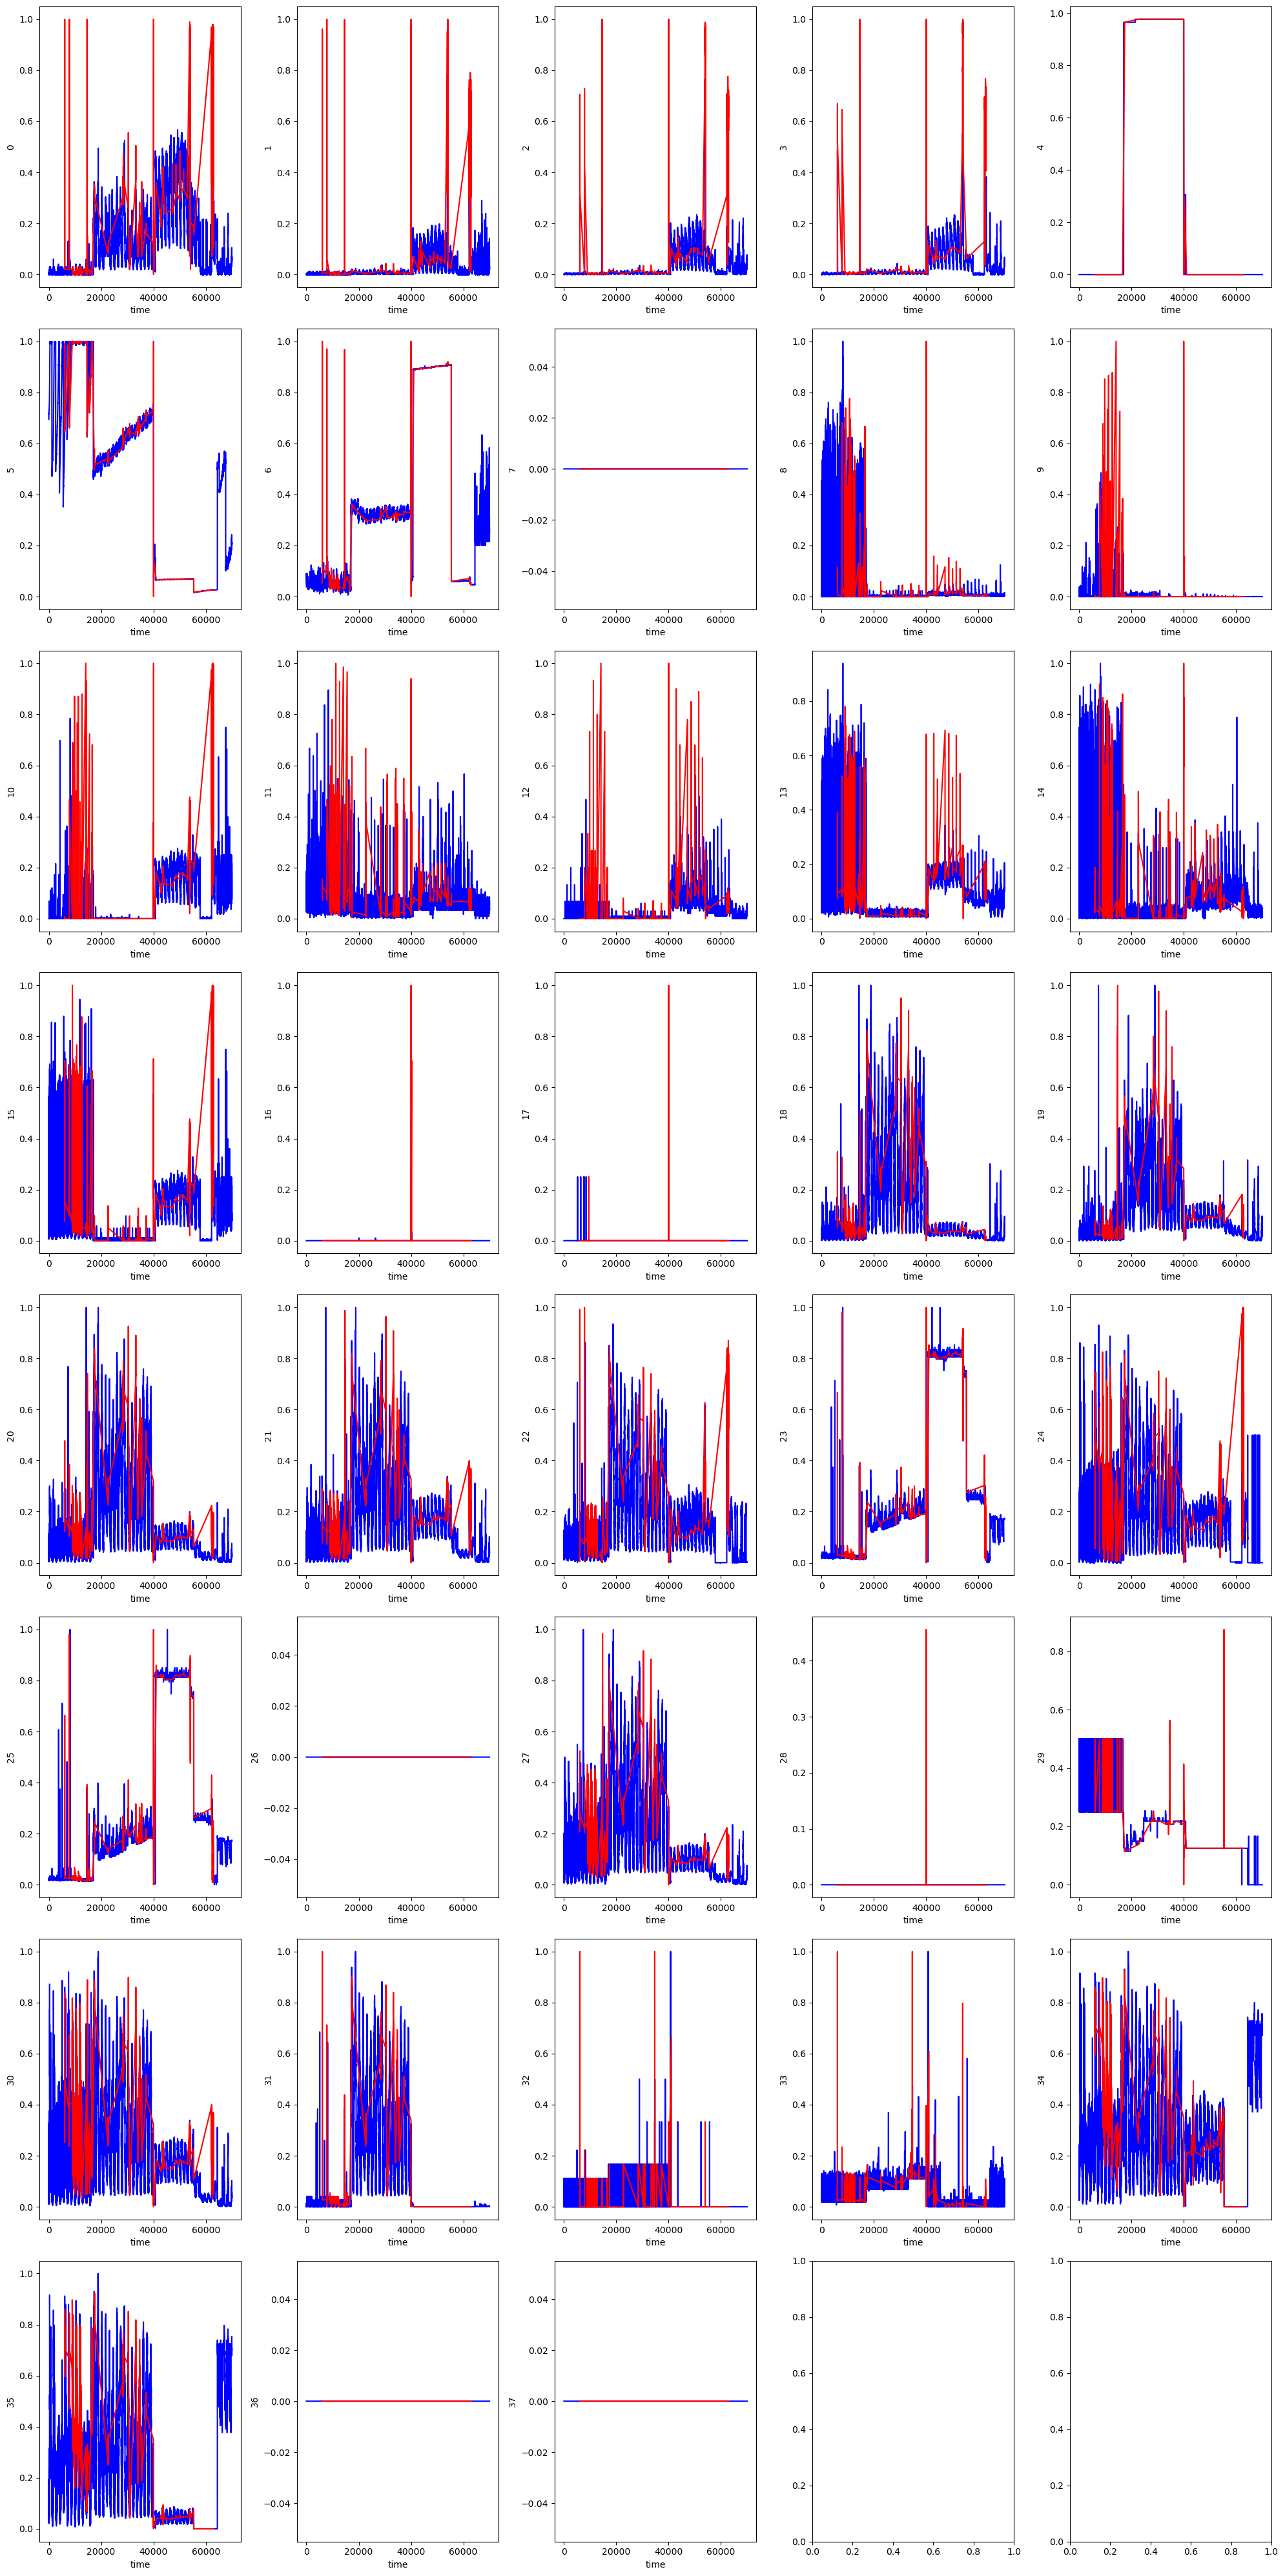

In [15]:
# test data with anamolies
fig, axes = plt.subplots(8, 5, figsize=(20, 40))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot data on each subplot
for i in range(38):
    ax = axes[i]
    plot = ax.plot(test_label[test_label["0"]==0].index,test[str(i)][test_label[test_label["0"]==0].index],'b') #not anamolies
    plot = ax.plot(test_label[test_label["0"]==1].index,test[str(i)][test_label[test_label["0"]==1].index],'r') #anamolies

    ax.set_xlabel('time')
    ax.set_ylabel(f'{i}')
    # ax.legend([plot],[0,1])
    
plt.tight_layout()
plt.show()

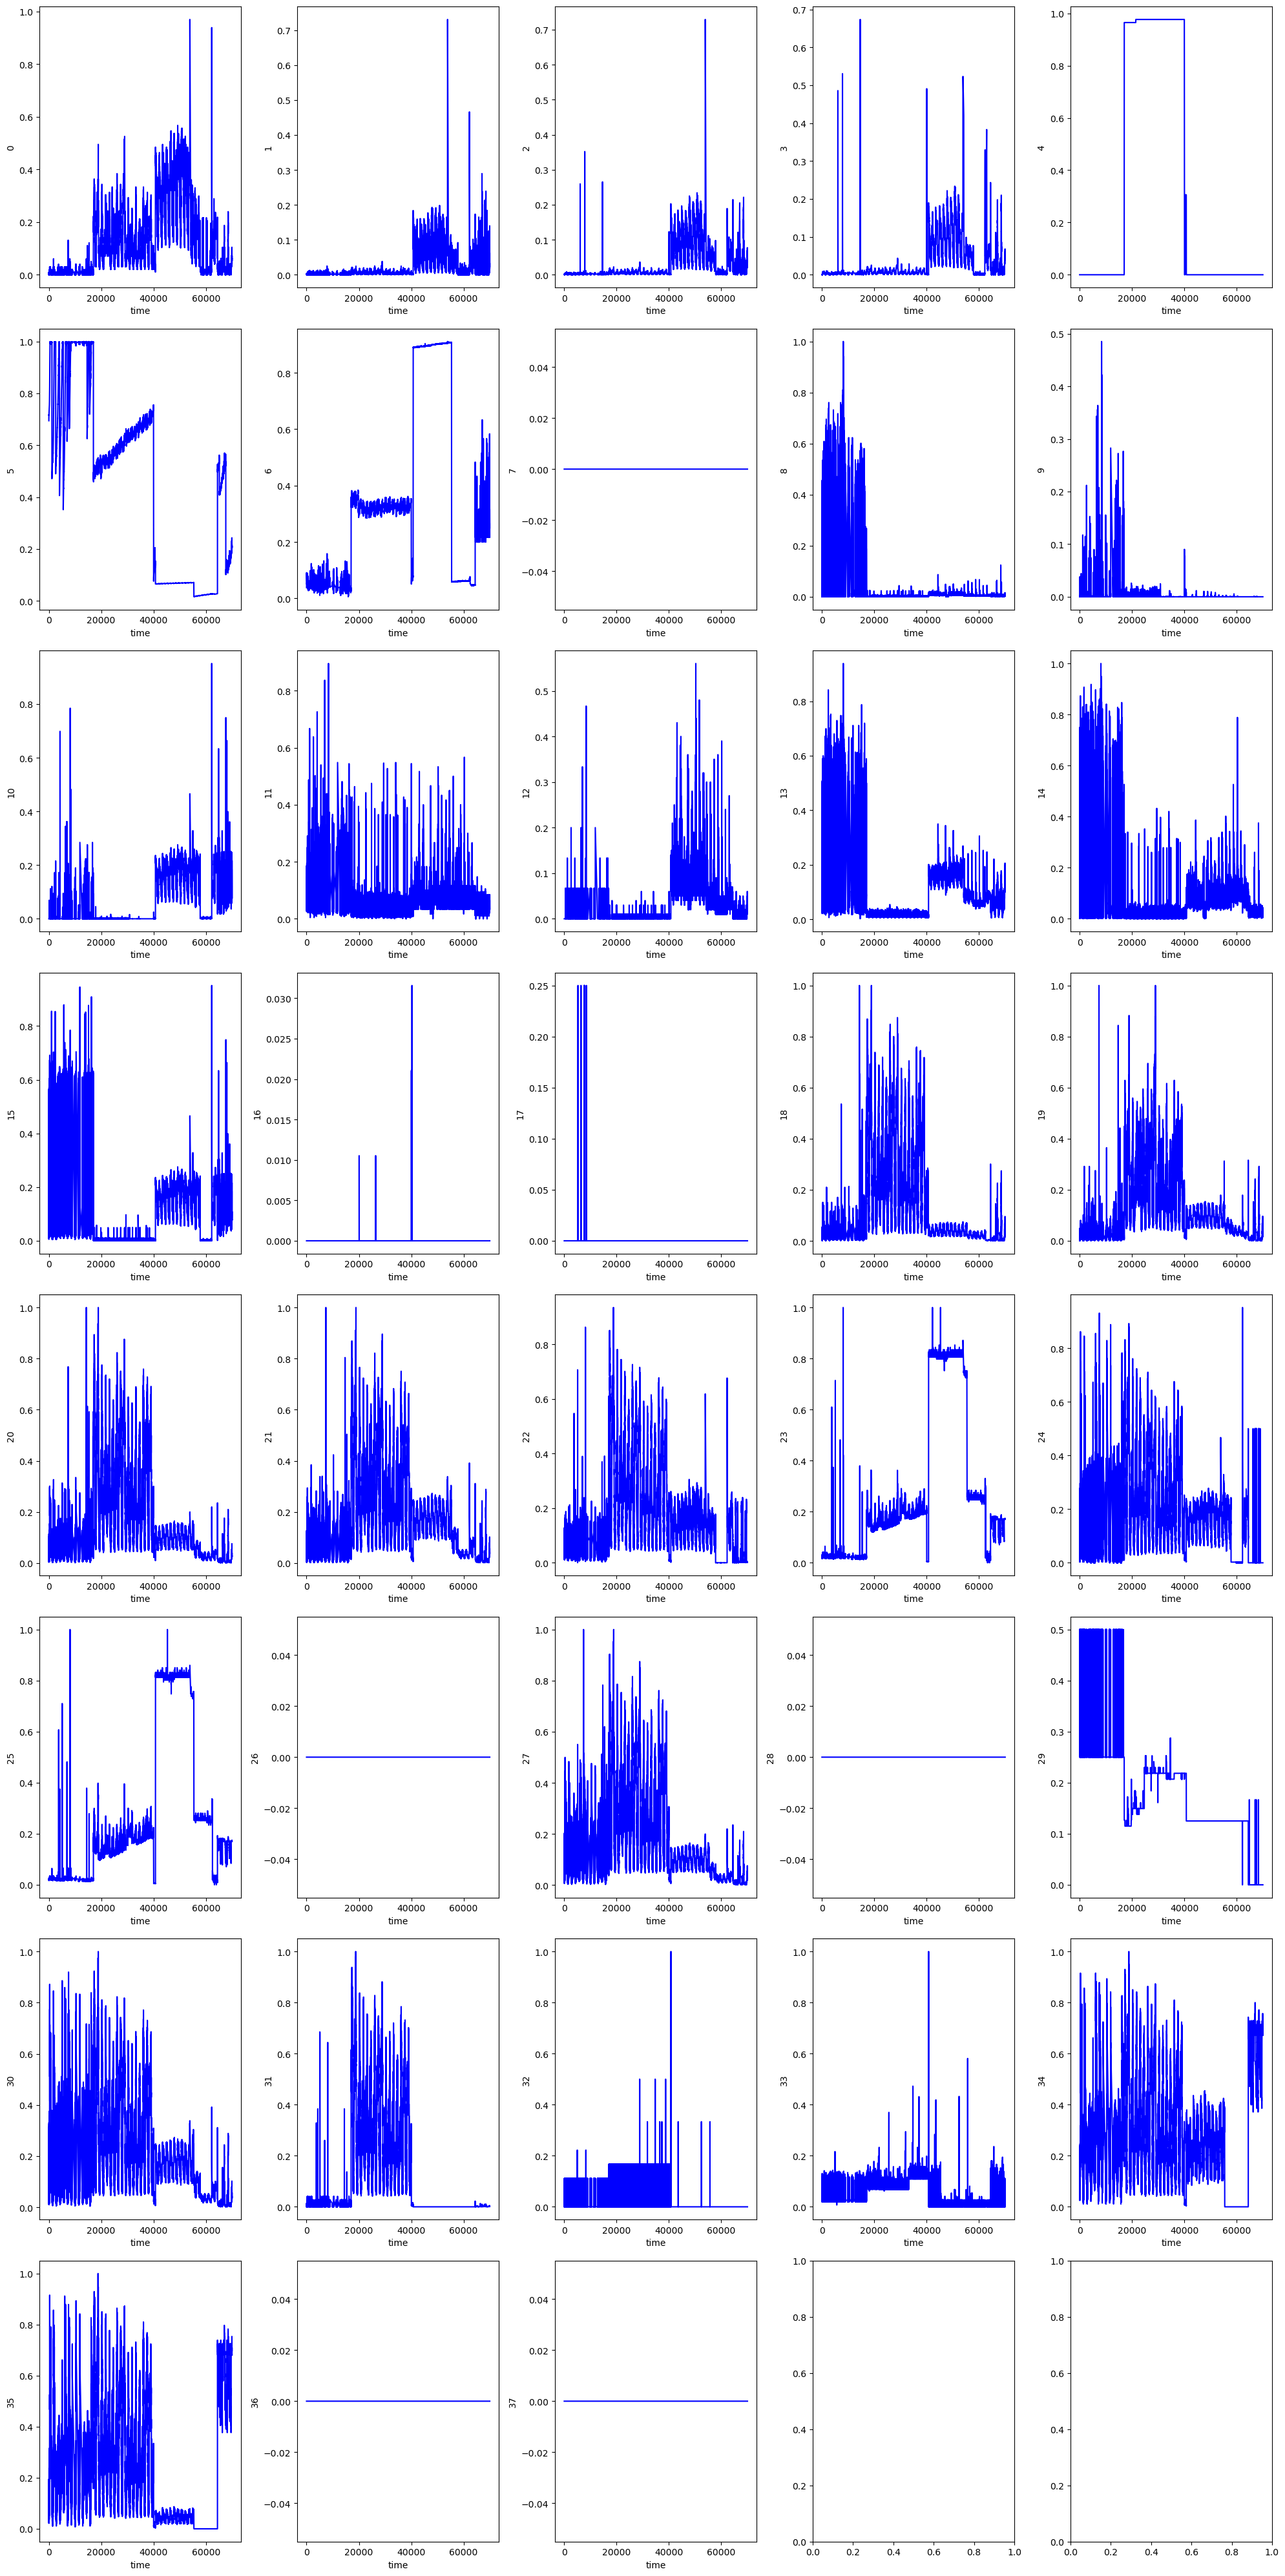

In [16]:
# test data with anamolies
fig, axes = plt.subplots(8, 5, figsize=(20, 40))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot data on each subplot
for i in range(38):
    ax = axes[i]
    plot = ax.plot(test_label[test_label["0"]==0].index,test[str(i)][test_label[test_label["0"]==0].index],'b') #not anamoly

    ax.set_xlabel('time')
    ax.set_ylabel(f'{i}')
    # ax.legend([plot],[0,1])
    
plt.tight_layout()
plt.show()

In [17]:
# for smap data
smap_test.shape

(427617, 25)

In [18]:
smap_test["0"].value_counts()

0
-1.000000    94502
 1.000000    49058
 0.991968     7227
 1.000000     3422
-0.999494     2262
             ...  
-0.645088        1
-0.644857        1
-0.644625        1
-0.644394        1
 0.408206        1
Name: count, Length: 54887, dtype: int64

In [19]:
for i in range(24):
    print(f"Column {i}: Min value: {smap_test.iloc[:, i].min()}, Max value: {smap_test.iloc[:, i].max()} Unique values: {smap_test.iloc[:, i].unique()}")

Column 0: Min value: -1.0, Max value: 1.0000000000000004 Unique values: [ 1.         -1.         -0.71192239 ...  0.95713225  0.98773755
  0.97242602]
Column 1: Min value: 0.0, Max value: 1.0 Unique values: [0. 1.]
Column 2: Min value: 0.0, Max value: 1.0 Unique values: [0. 1.]
Column 3: Min value: 0.0, Max value: 1.0 Unique values: [0. 1.]
Column 4: Min value: 0.0, Max value: 1.0 Unique values: [0. 1.]
Column 5: Min value: 0.0, Max value: 1.0 Unique values: [0. 1.]
Column 6: Min value: 0.0, Max value: 1.0 Unique values: [0. 1.]
Column 7: Min value: 0.0, Max value: 1.0 Unique values: [0. 1.]
Column 8: Min value: 0.0, Max value: 1.0 Unique values: [0. 1.]
Column 9: Min value: 0.0, Max value: 1.0 Unique values: [0. 1.]
Column 10: Min value: 0.0, Max value: 1.0 Unique values: [0. 1.]
Column 11: Min value: 0.0, Max value: 1.0 Unique values: [0. 1.]
Column 12: Min value: 0.0, Max value: 1.0 Unique values: [0. 1.]
Column 13: Min value: 0.0, Max value: 1.0 Unique values: [0. 1.]
Column 14: Mi

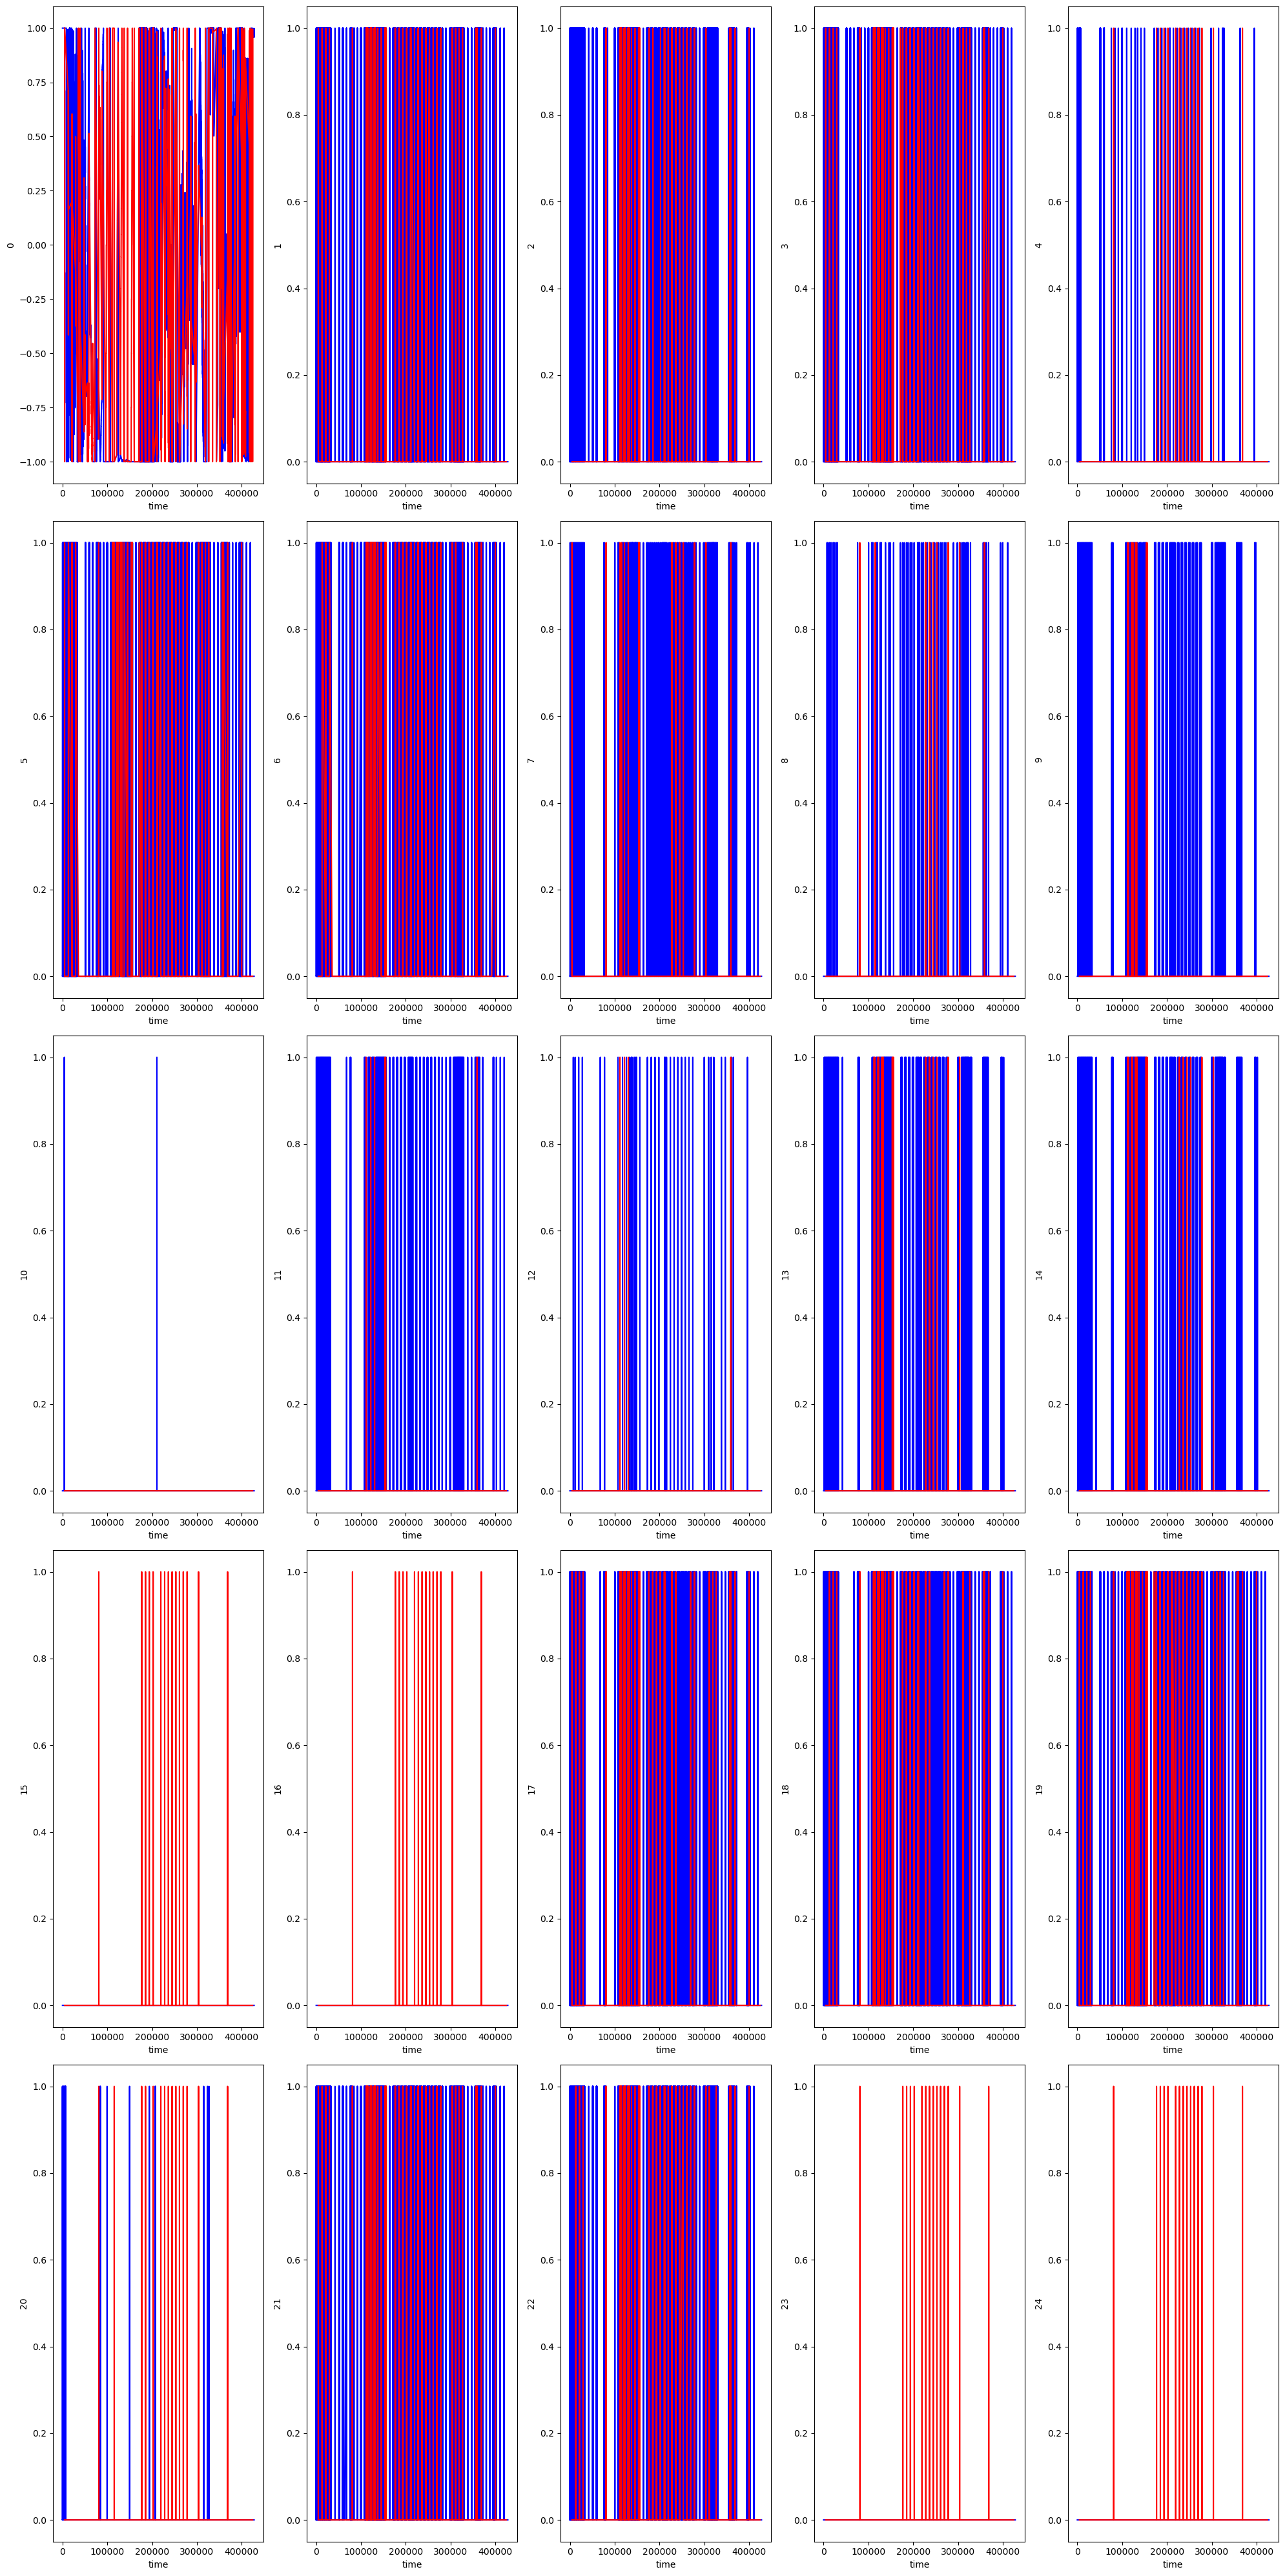

In [49]:
# smap data with anamolies

fig, axes = plt.subplots(5, 5, figsize=(20, 40))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot data on each subplot
for i in range(25):
    ax = axes[i]
    plot = ax.plot(smap_test.index[smap_test_label[smap_test_label["0"]==0].index],smap_test[str(i)][smap_test_label[smap_test_label["0"]==0].index],c="blue") # not anomaly
    plot = ax.plot(smap_test.index[smap_test_label[smap_test_label["0"]==1].index],smap_test[str(i)][smap_test_label[smap_test_label["0"]==1].index],c="red") # anomaly
    ax.set_xlabel('time')
    ax.set_ylabel(f'{i}')
 
    
plt.tight_layout()
plt.show()

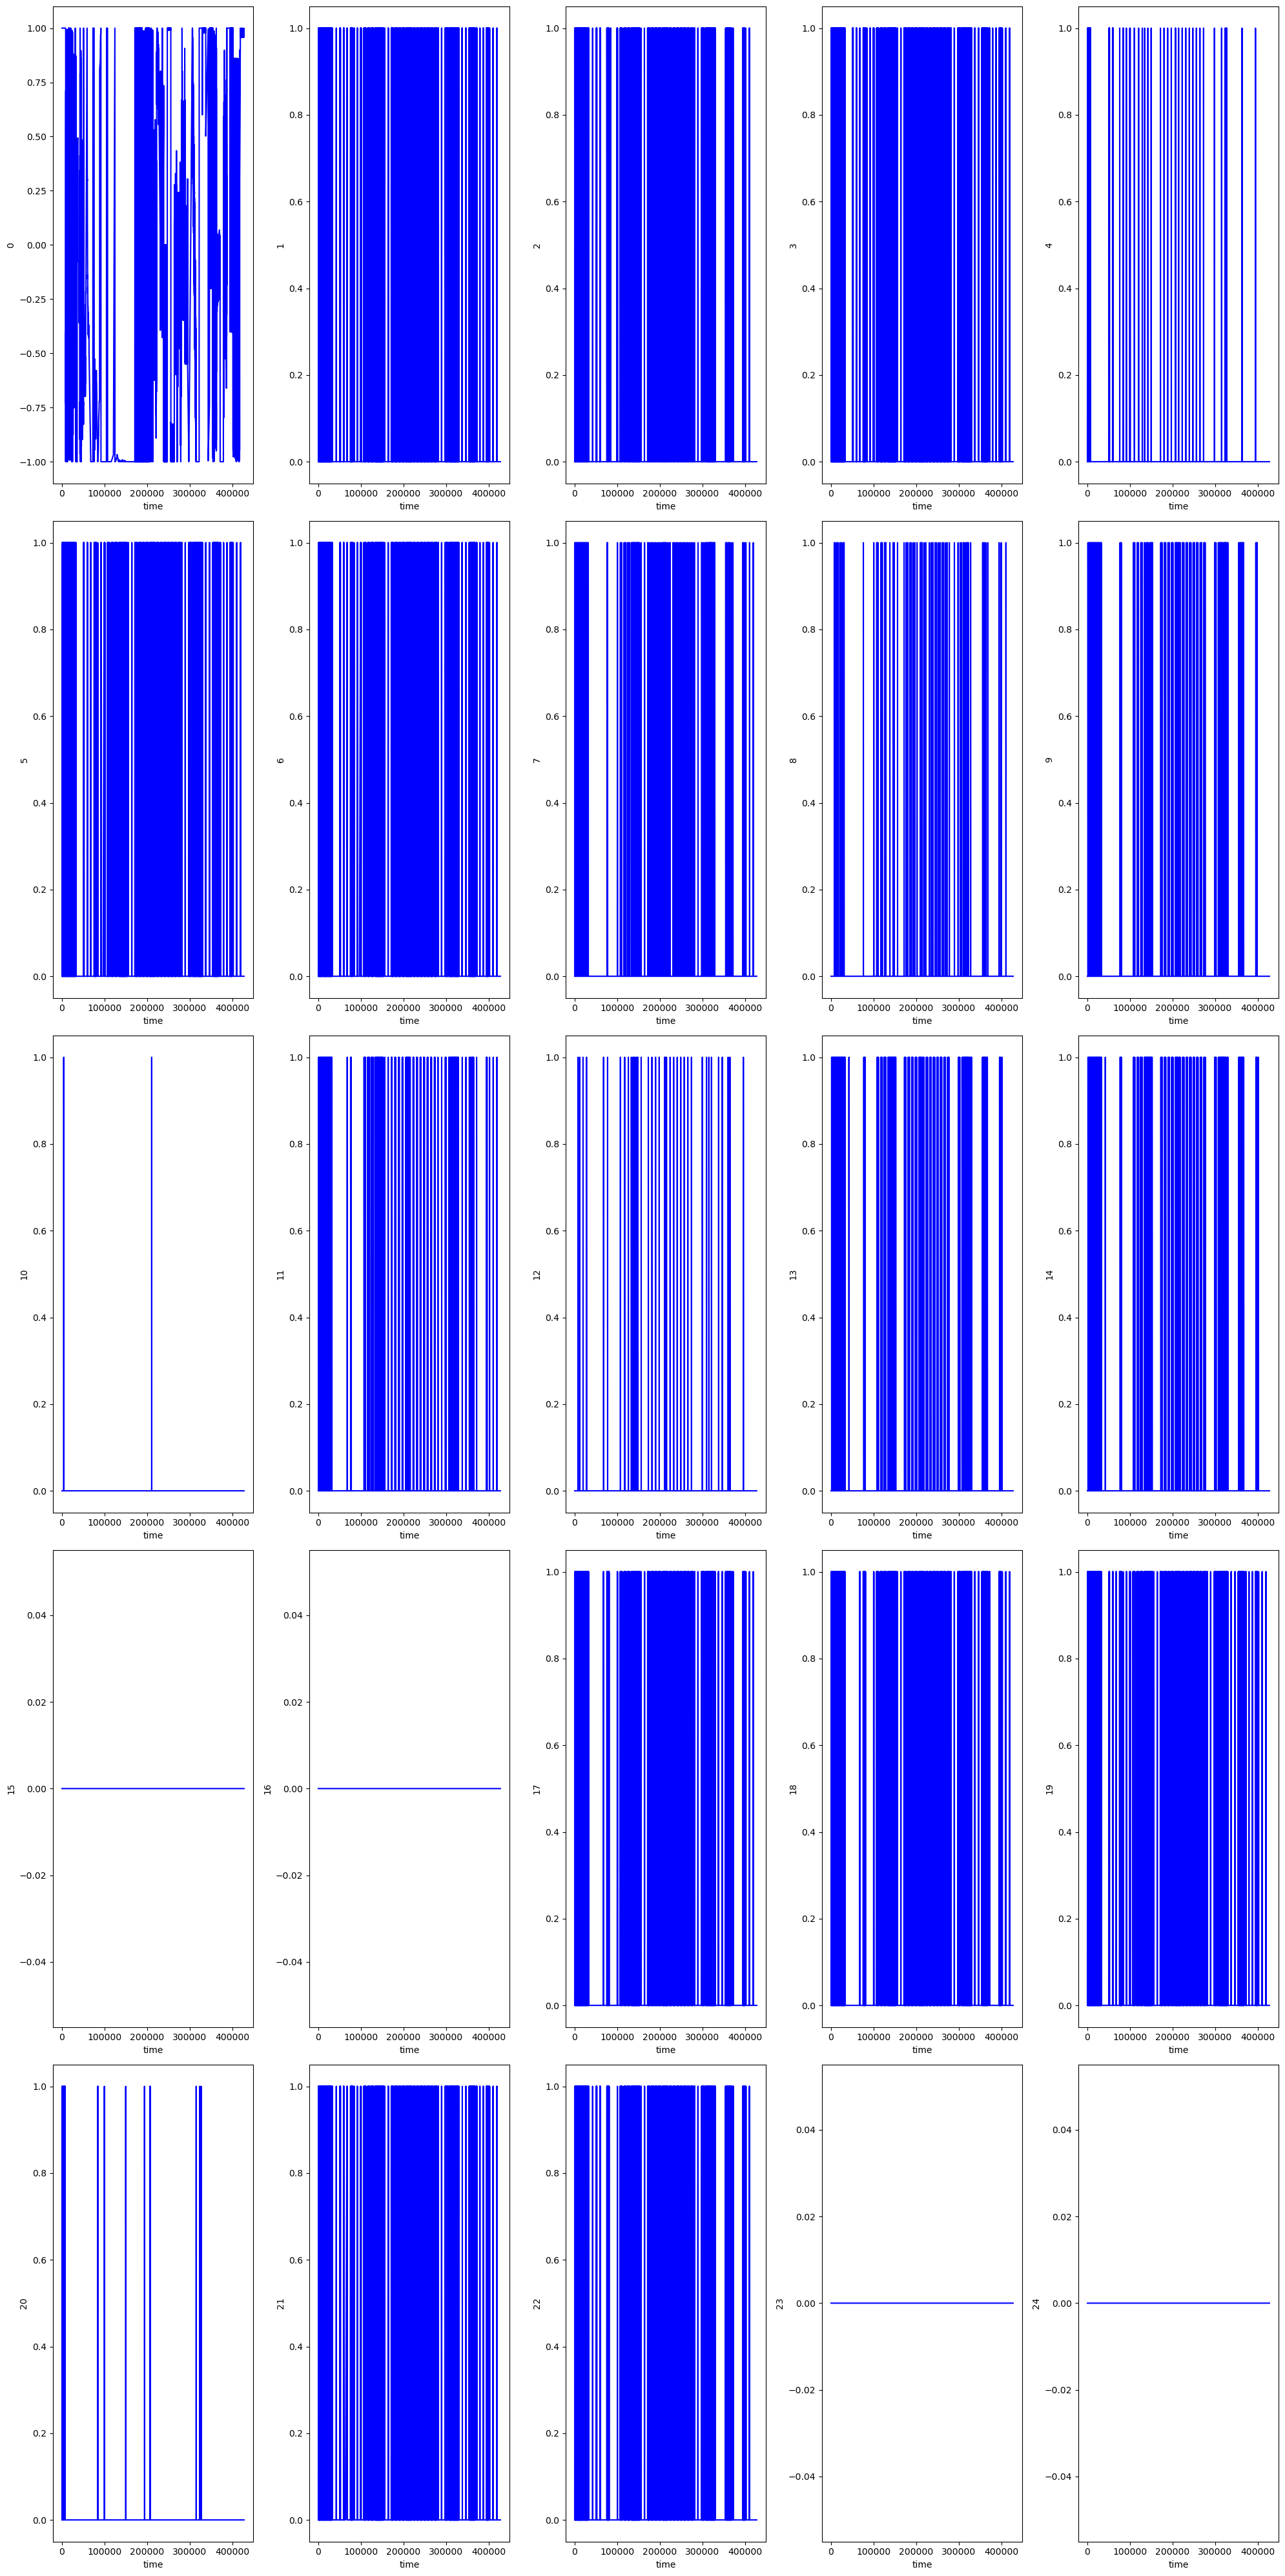

In [50]:
# smap data with anamolies

fig, axes = plt.subplots(5, 5, figsize=(20, 40))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot data on each subplot
for i in range(25):
    ax = axes[i]
    plot = ax.plot(smap_test.index[smap_test_label[smap_test_label["0"]==0].index],smap_test[str(i)][smap_test_label[smap_test_label["0"]==0].index],c="blue") # not anomaly
    ax.set_xlabel('time')
    ax.set_ylabel(f'{i}')
 
    
plt.tight_layout()
plt.show()

In [22]:
psm_test.shape

(87841, 26)

In [23]:
for i in range(24):
    print(f"Column {i}: Min value: {psm_test.iloc[:, i].min()}, Max value: {psm_test.iloc[:, i].max()} Unique values: {psm_test.iloc[:, i].unique()}")

Column 0: Min value: 132480.0, Max value: 220320.0 Unique values: [132480. 132481. 132482. ... 220318. 220319. 220320.]
Column 1: Min value: 0.5217010842566869, Max value: 0.9288927409954616 Unique values: [0.77537391 0.77542284 0.77545752 ... 0.86464373 0.86455324 0.86469538]
Column 2: Min value: 0.3874150248626241, Max value: 1.0 Unique values: [0.90918513 0.90914178 0.90900362 ... 0.63623614 0.64349934 0.64533732]
Column 3: Min value: 0.4535107446145194, Max value: 0.7208982913546765 Unique values: [0.60670411 0.60779595 0.60798786 ... 0.59045057 0.59022195 0.59073139]
Column 4: Min value: 0.3311630899790935, Max value: 1.0 Unique values: [0.6606256  0.66065519 0.66062336 ... 0.41361875 0.41368929 0.41373161]
Column 5: Min value: 0.0737652341244387, Max value: 1.0 Unique values: [0.44996793 0.4878127  0.46953175 ... 0.32135985 0.322322   0.31462476]
Column 6: Min value: 0.1174422285533396, Max value: 1.0 Unique values: [0.42671732 0.44254511 0.43368154 ... 0.33016777 0.33839823 0.32

In [24]:
psm_test.head()

timestamp_(min)  feature_0  feature_1  feature_2  feature_3  feature_4  \
0         132480.0   0.775374   0.909185   0.606704   0.660626   0.449968   
1         132481.0   0.775423   0.909142   0.607796   0.660655   0.487813   
2         132482.0   0.775458   0.909004   0.607988   0.660623   0.469532   
3         132483.0   0.775513   0.909200   0.607218   0.660640   0.459910   
4         132484.0   0.775587   0.909318   0.606654   0.660643   0.462155   

   feature_5  feature_6  feature_7  feature_8  ...  feature_15  feature_16  \
0   0.426717   0.471591   0.434668   0.479511  ...    0.400617    0.480444   
1   0.442545   0.505682   0.448640   0.499451  ...    0.396902    0.500213   
2   0.433682   0.477273   0.450906   0.487223  ...    0.389270    0.487982   
3   0.435581   0.482955   0.454683   0.490431  ...    0.403780    0.491253   
4   0.436214   0.477273   0.449396   0.494671  ...    0.403636    0.495947   

   feature_17  feature_18  feature_19  feature_20  feature_21  feature_22  \
0    0.588670    0.404036    0.638957    0.020236    0.042705    0.173375   
1    0.587041    0.421605    0.637865    0.018550    0.042705    0.191826   
2    0.582404    0.407393    0.636091    0.018550    0.039146    0.188361   
3    0.584660    0.407141    0.638138    0.020236    0.042705    0.186975   
4    0.581527    0.402761    0.632678    0.021922    0.042705    0.156325   

   feature_23  feature_24  
0    0.008715    0.105991  
1    0.010893    0.110599  
2    0.010893    0.115207  
3    0.013072    0.110599  
4    0.008715    0.110599  

[5 rows x 26 columns]

In [25]:
psm_test_label.head()

timestamp_(min)  label
0         132480.0      0
1         132481.0      0
2         132482.0      0
3         132483.0      0
4         132484.0      0

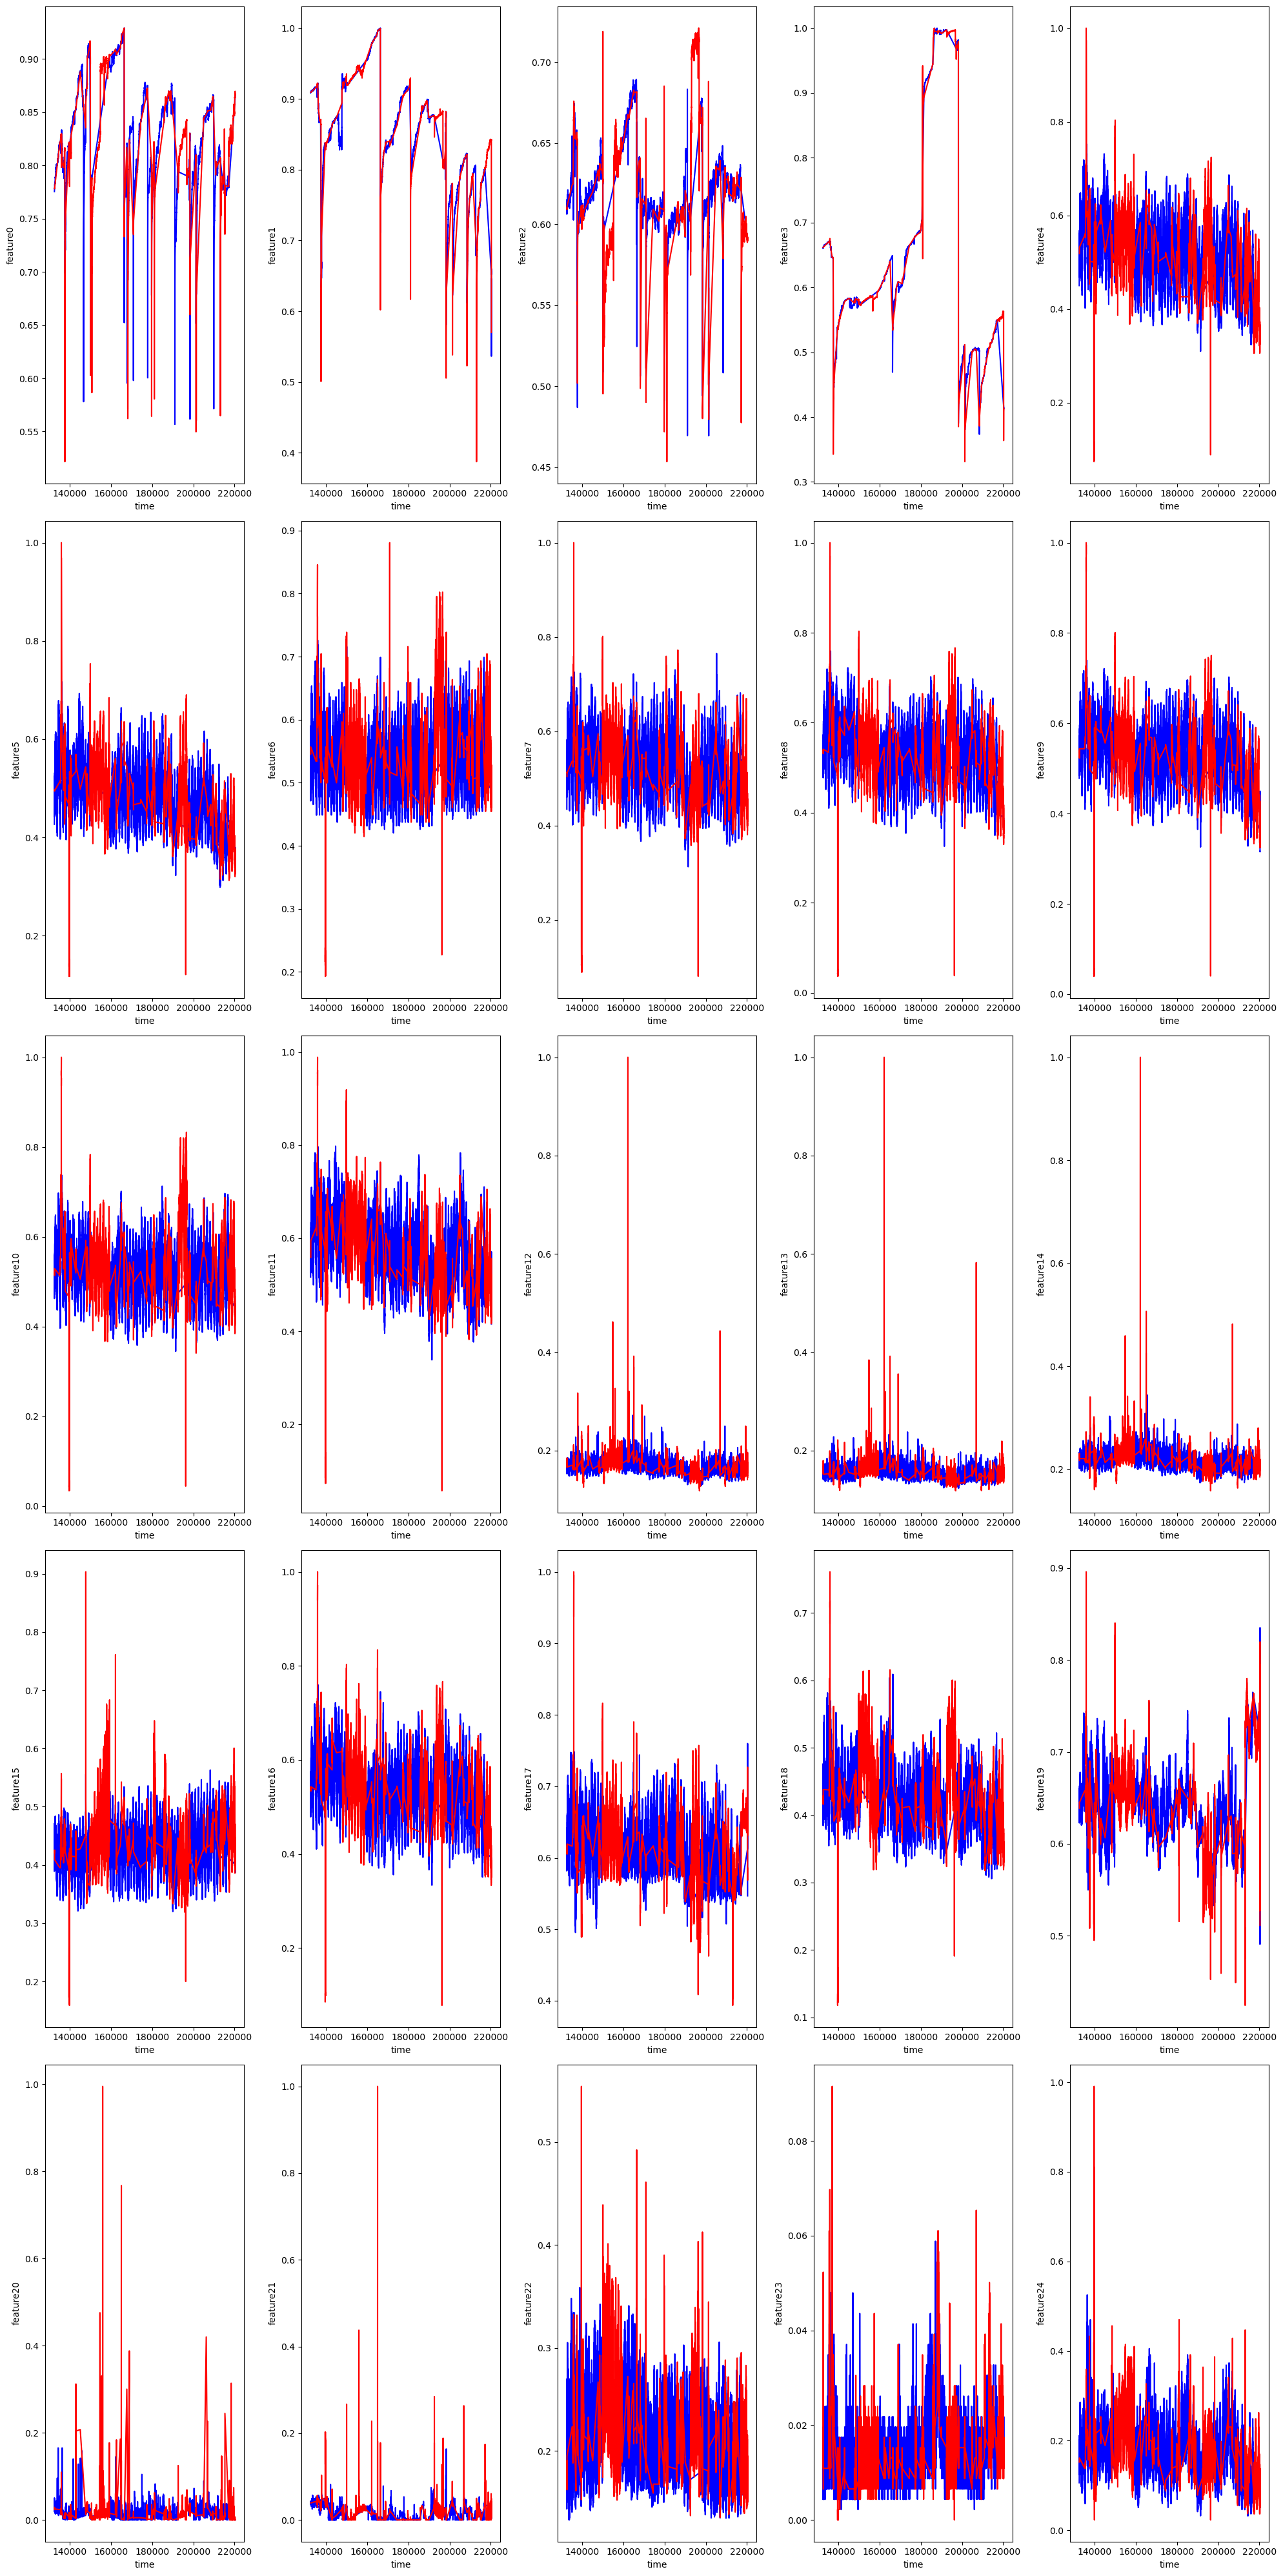

In [51]:
# psm data with anamolies

fig, axes = plt.subplots(5, 5, figsize=(20, 40))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot data on each subplot
for i in range(25):
    ax = axes[i]
    plot = ax.plot(psm_test["timestamp_(min)"][psm_test_label[psm_test_label["label"]==0].index],psm_test[f"feature_{i}"][psm_test_label[psm_test_label["label"]==0].index],c="blue") # not anomaly
    plot = ax.plot(psm_test["timestamp_(min)"][psm_test_label[psm_test_label["label"]==1].index],psm_test[f"feature_{i}"][psm_test_label[psm_test_label["label"]==1].index],c="red") # anomaly
    ax.set_xlabel('time')
    ax.set_ylabel(f'feature{i}')
   
    
plt.tight_layout()
plt.show()

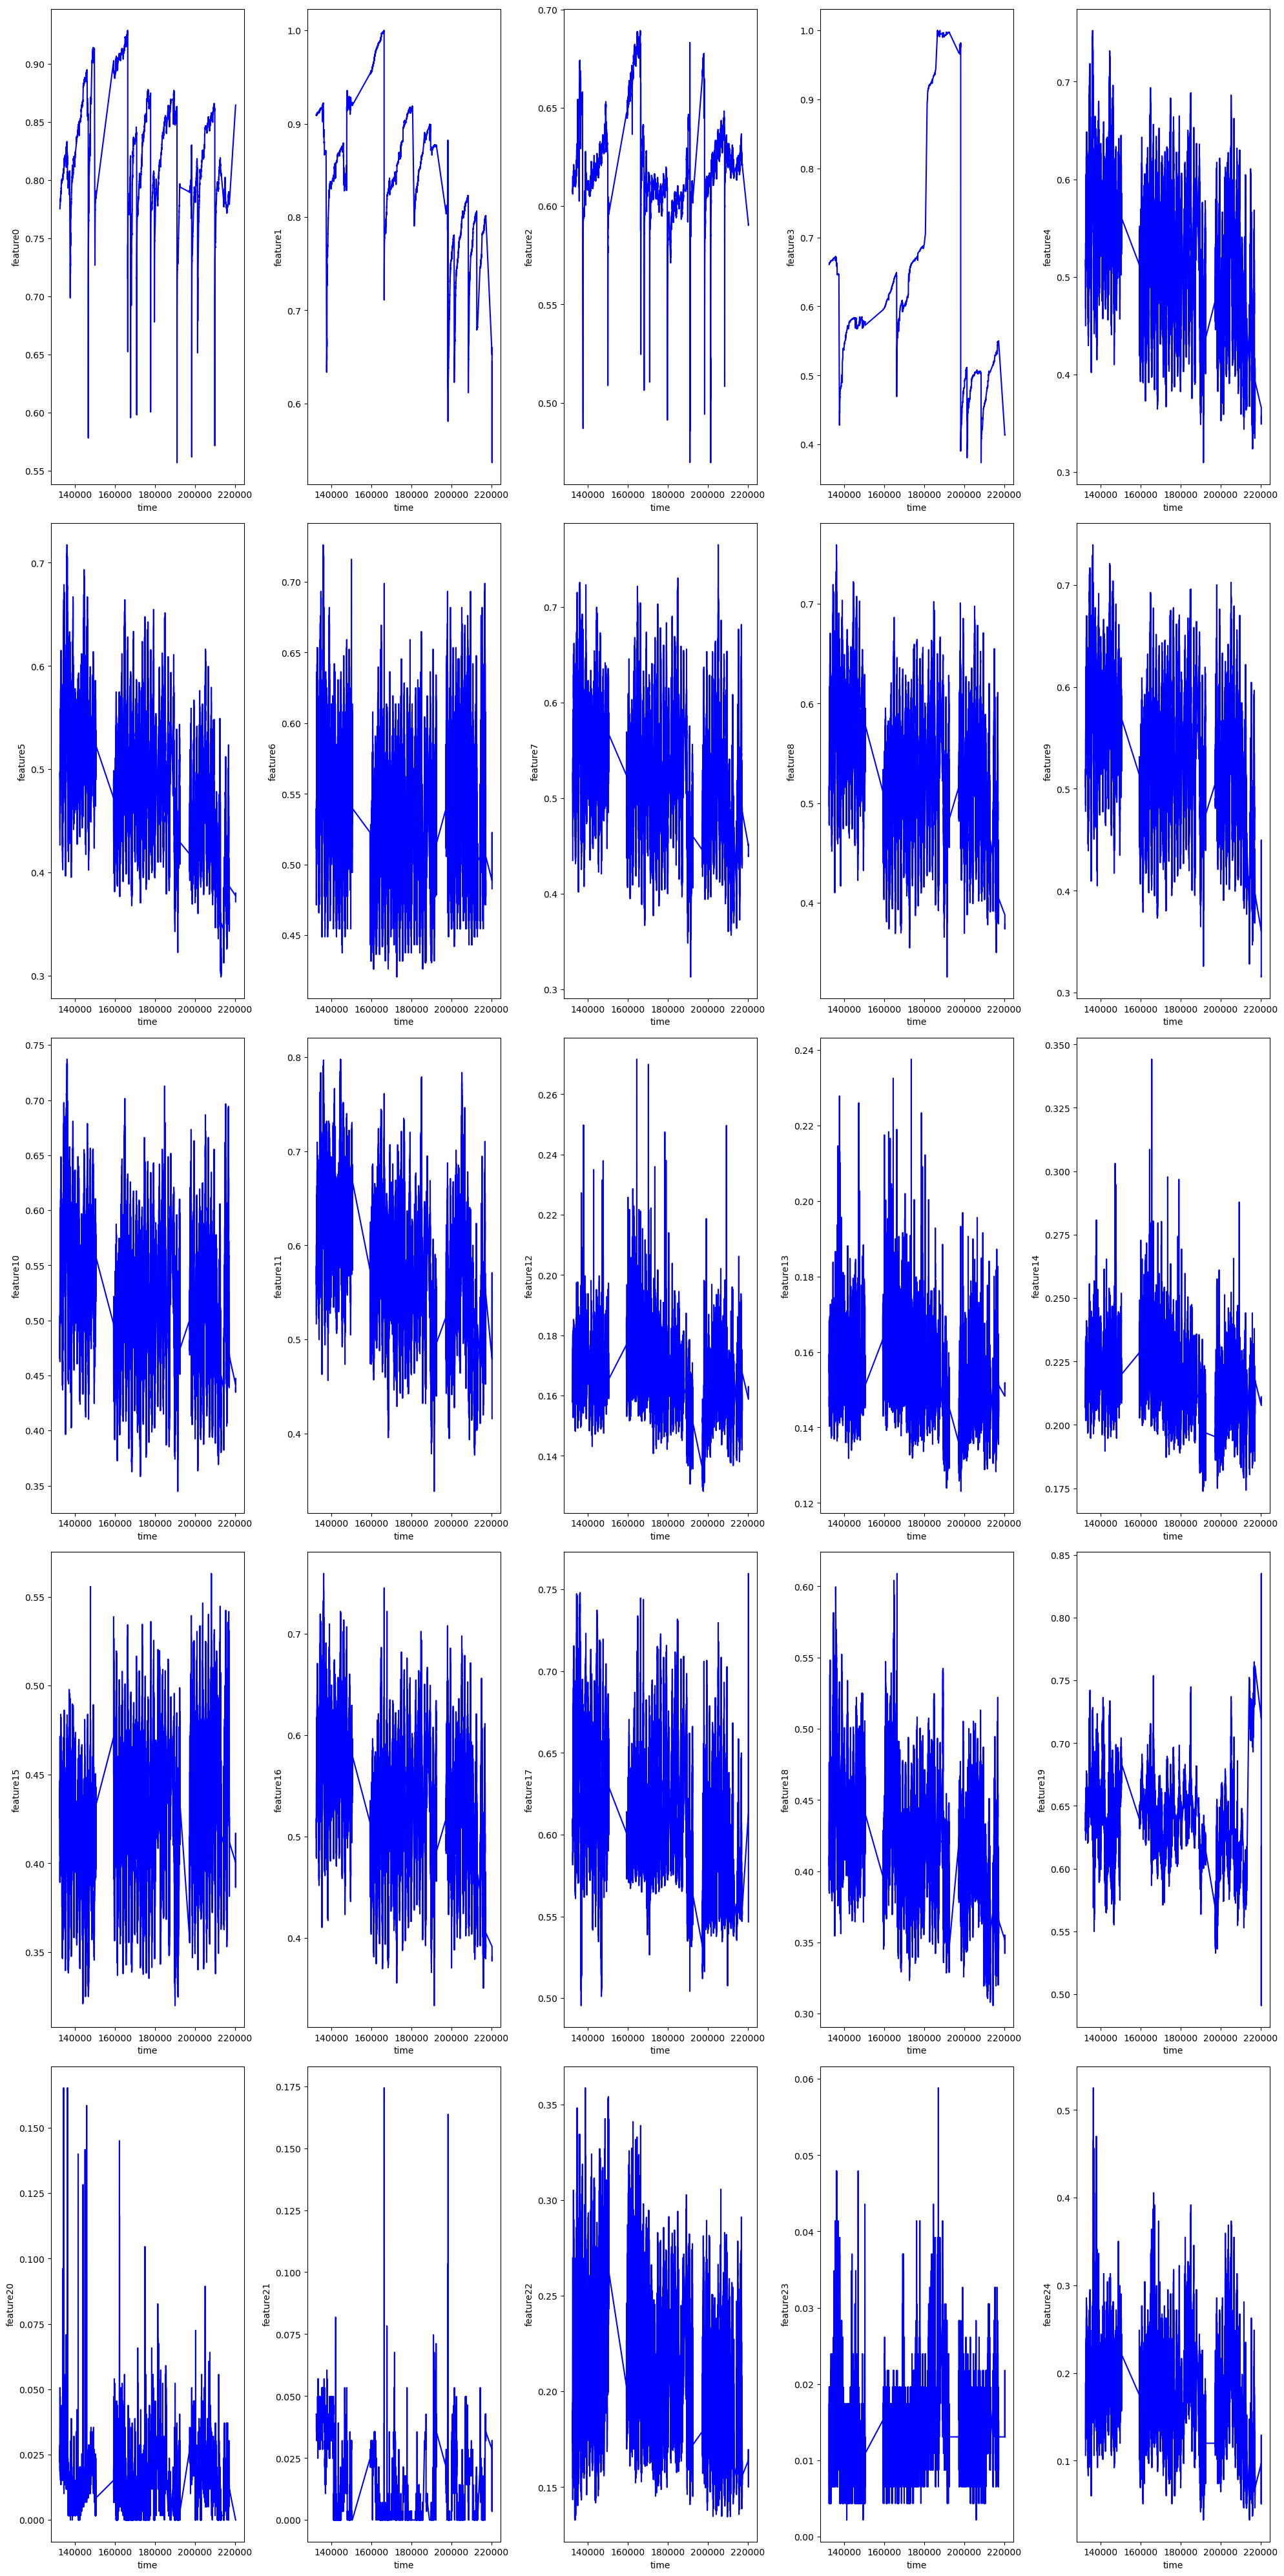

In [52]:
# psm data without anamolies

fig, axes = plt.subplots(5, 5, figsize=(20, 40))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot data on each subplot
for i in range(25):
    ax = axes[i]
    plot = ax.plot(psm_test["timestamp_(min)"][psm_test_label[psm_test_label["label"]==0].index],psm_test[f"feature_{i}"][psm_test_label[psm_test_label["label"]==0].index],c="blue") # not anomaly
    ax.set_xlabel('time')
    ax.set_ylabel(f'feature{i}')
 
    
plt.tight_layout()
plt.show()

In [28]:
msl_test.shape

(73729, 55)

In [29]:
for i in range(55):
    print(f"Column {i}: Min value: {msl_test.iloc[:, i].min()}, Max value: {msl_test.iloc[:, i].max()} Unique values: {msl_test.iloc[:, i].unique()}")

Column 0: Min value: -1.424197396, Max value: 258.1081081 Unique values: [-0.94695788 -0.94227769 -0.93603744 ... -0.93340104  0.49914924
 -0.95421168]
Column 1: Min value: 0, Max value: 0 Unique values: [0]
Column 2: Min value: 0, Max value: 0 Unique values: [0]
Column 3: Min value: 0, Max value: 0 Unique values: [0]
Column 4: Min value: 0, Max value: 0 Unique values: [0]
Column 5: Min value: 0, Max value: 1 Unique values: [0 1]
Column 6: Min value: 0, Max value: 1 Unique values: [0 1]
Column 7: Min value: 0, Max value: 1 Unique values: [0 1]
Column 8: Min value: 0, Max value: 0 Unique values: [0]
Column 9: Min value: 0, Max value: 1 Unique values: [0 1]
Column 10: Min value: 0, Max value: 0 Unique values: [0]
Column 11: Min value: 0, Max value: 1 Unique values: [0 1]
Column 12: Min value: 0, Max value: 1 Unique values: [0 1]
Column 13: Min value: 0, Max value: 1 Unique values: [0 1]
Column 14: Min value: 0, Max value: 1 Unique values: [0 1]
Column 15: Min value: 0, Max value: 1 Uniqu

In [30]:
msl_test.head()

0  1  2  3  4  5  6  7  8  9  ...  45  46  47  48  49  50  51  52  \
0 -0.946958  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
1 -0.942278  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
2 -0.936037  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
3 -0.923557  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
4 -0.917317  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   

   53  54  
0   0   0  
1   0   0  
2   0   0  
3   0   0  
4   0   0  

[5 rows x 55 columns]

In [31]:
msl_test_label.head()

0
0  0
1  0
2  0
3  0
4  0

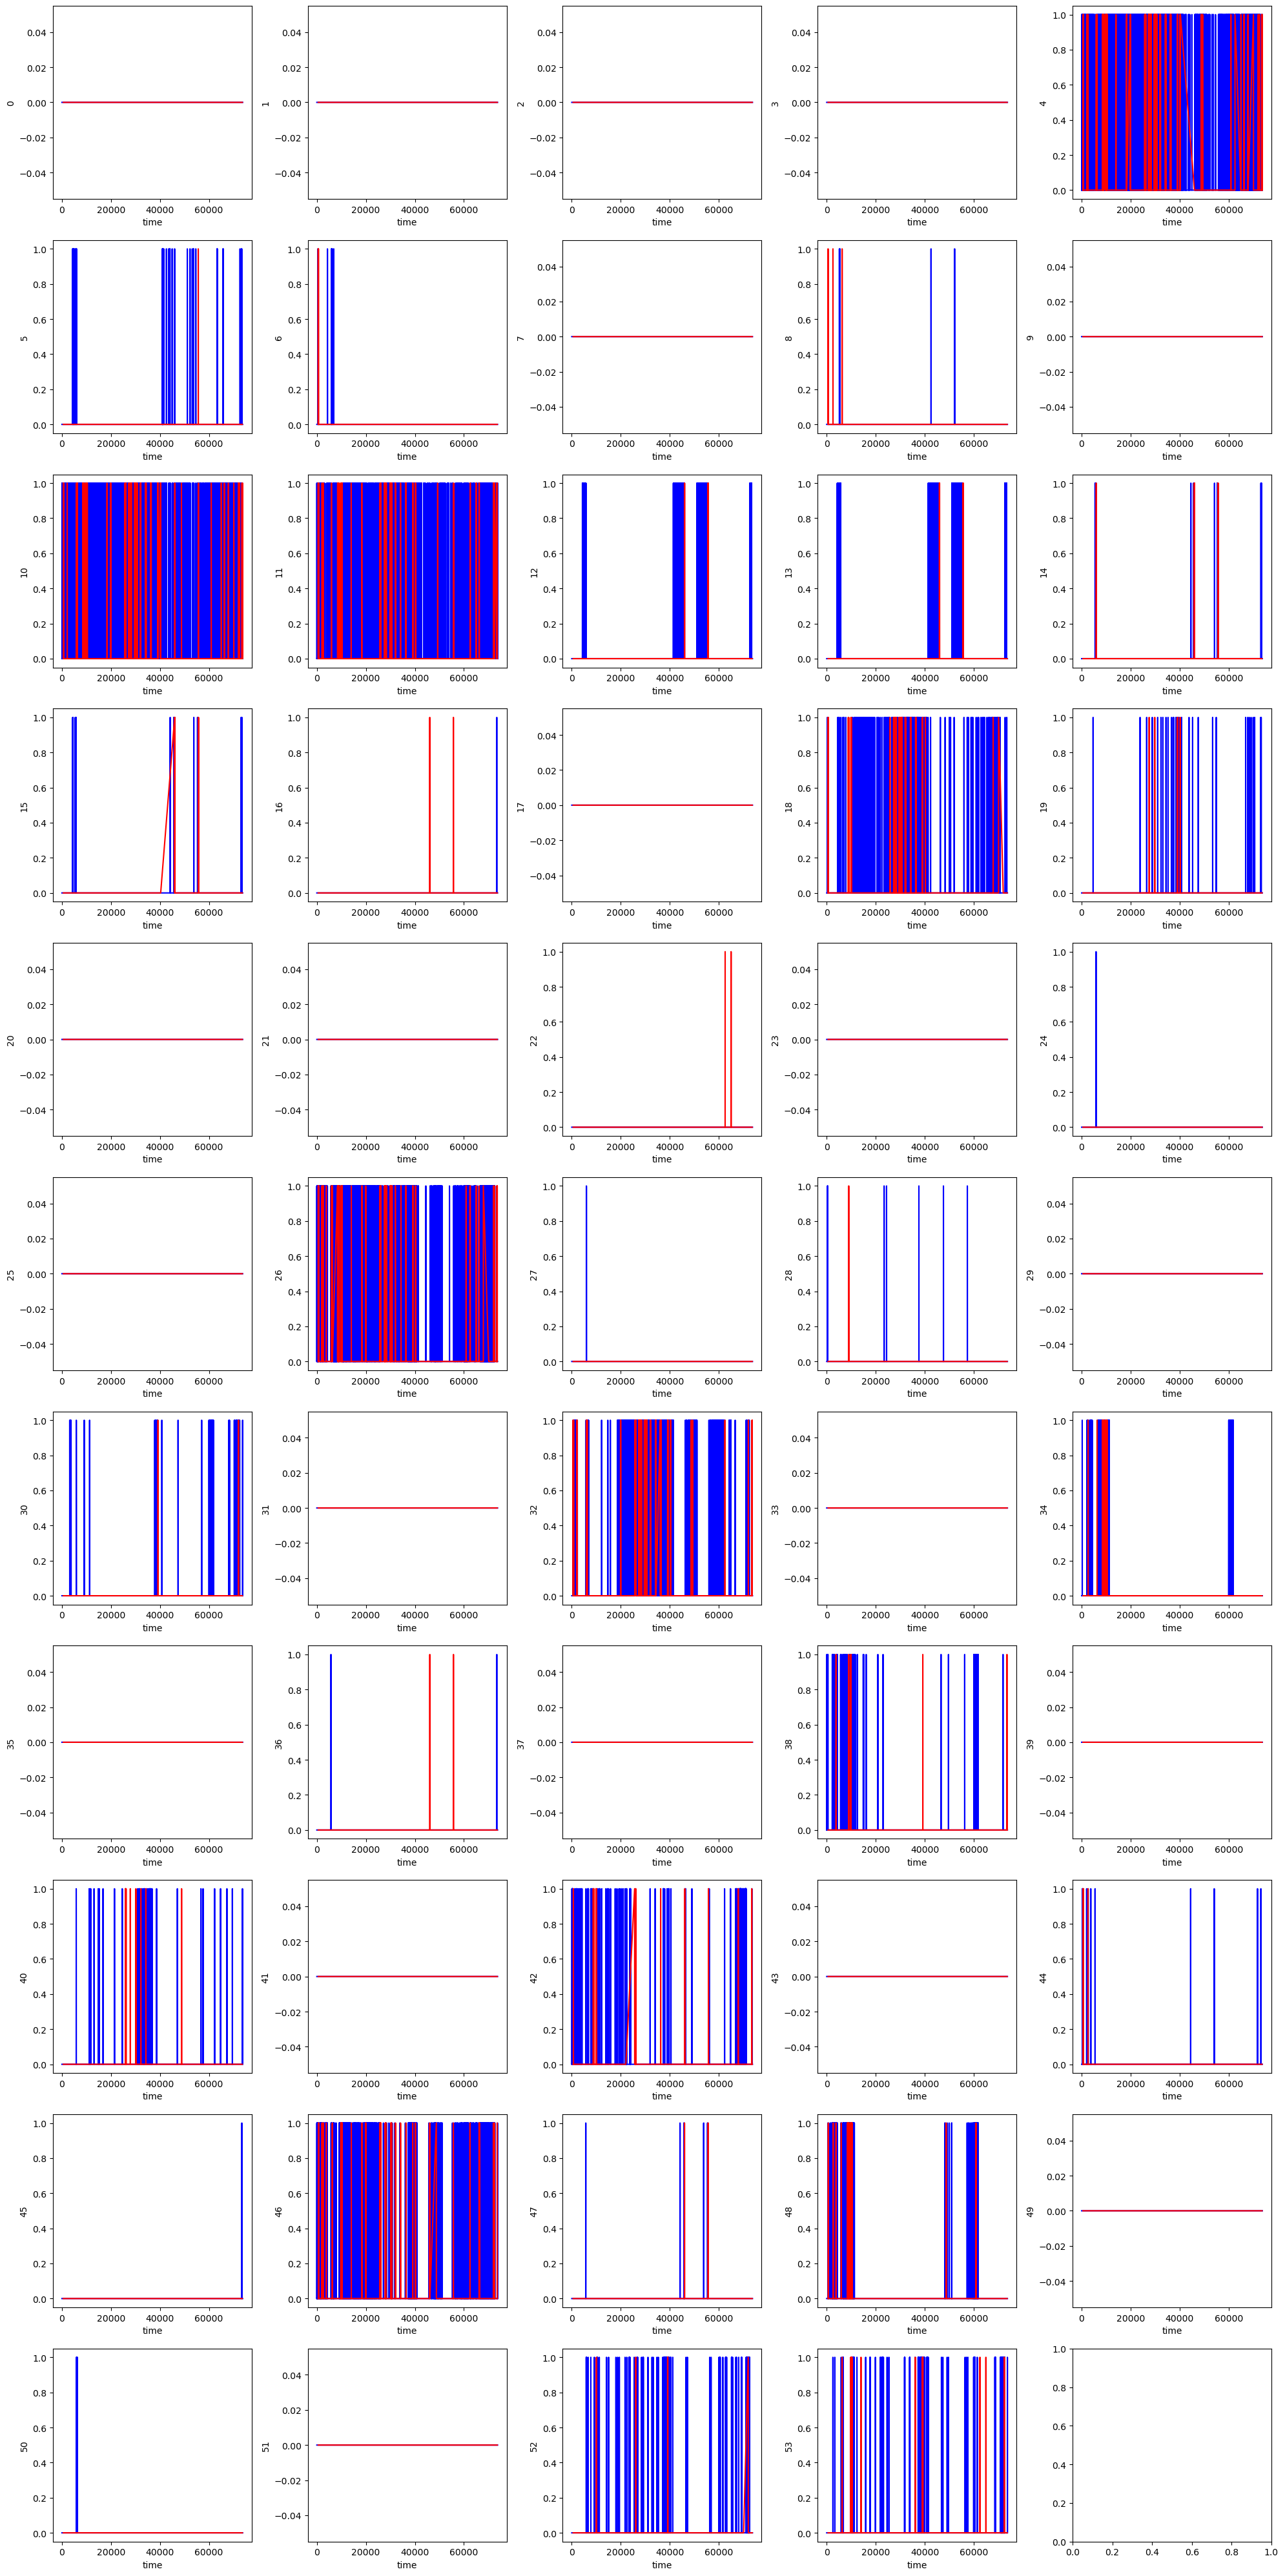

In [55]:
# msl data with anamolies

fig, axes = plt.subplots(11, 5, figsize=(20, 40))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot data on each subplot
for i in range(54):
    ax = axes[i]
    plot = ax.plot(msl_test.index[msl_test_label[msl_test_label["0"]==0].index],msl_test[str(i+1)][msl_test_label[msl_test_label["0"]==0].index],c="blue") # not anomaly
    plot = ax.plot(msl_test.index[msl_test_label[msl_test_label["0"]==1].index],msl_test[str(i+1)][msl_test_label[msl_test_label["0"]==1].index],c="red") # anomaly
    ax.set_xlabel('time')
    ax.set_ylabel(f'{i}')

    
plt.tight_layout()
plt.show()

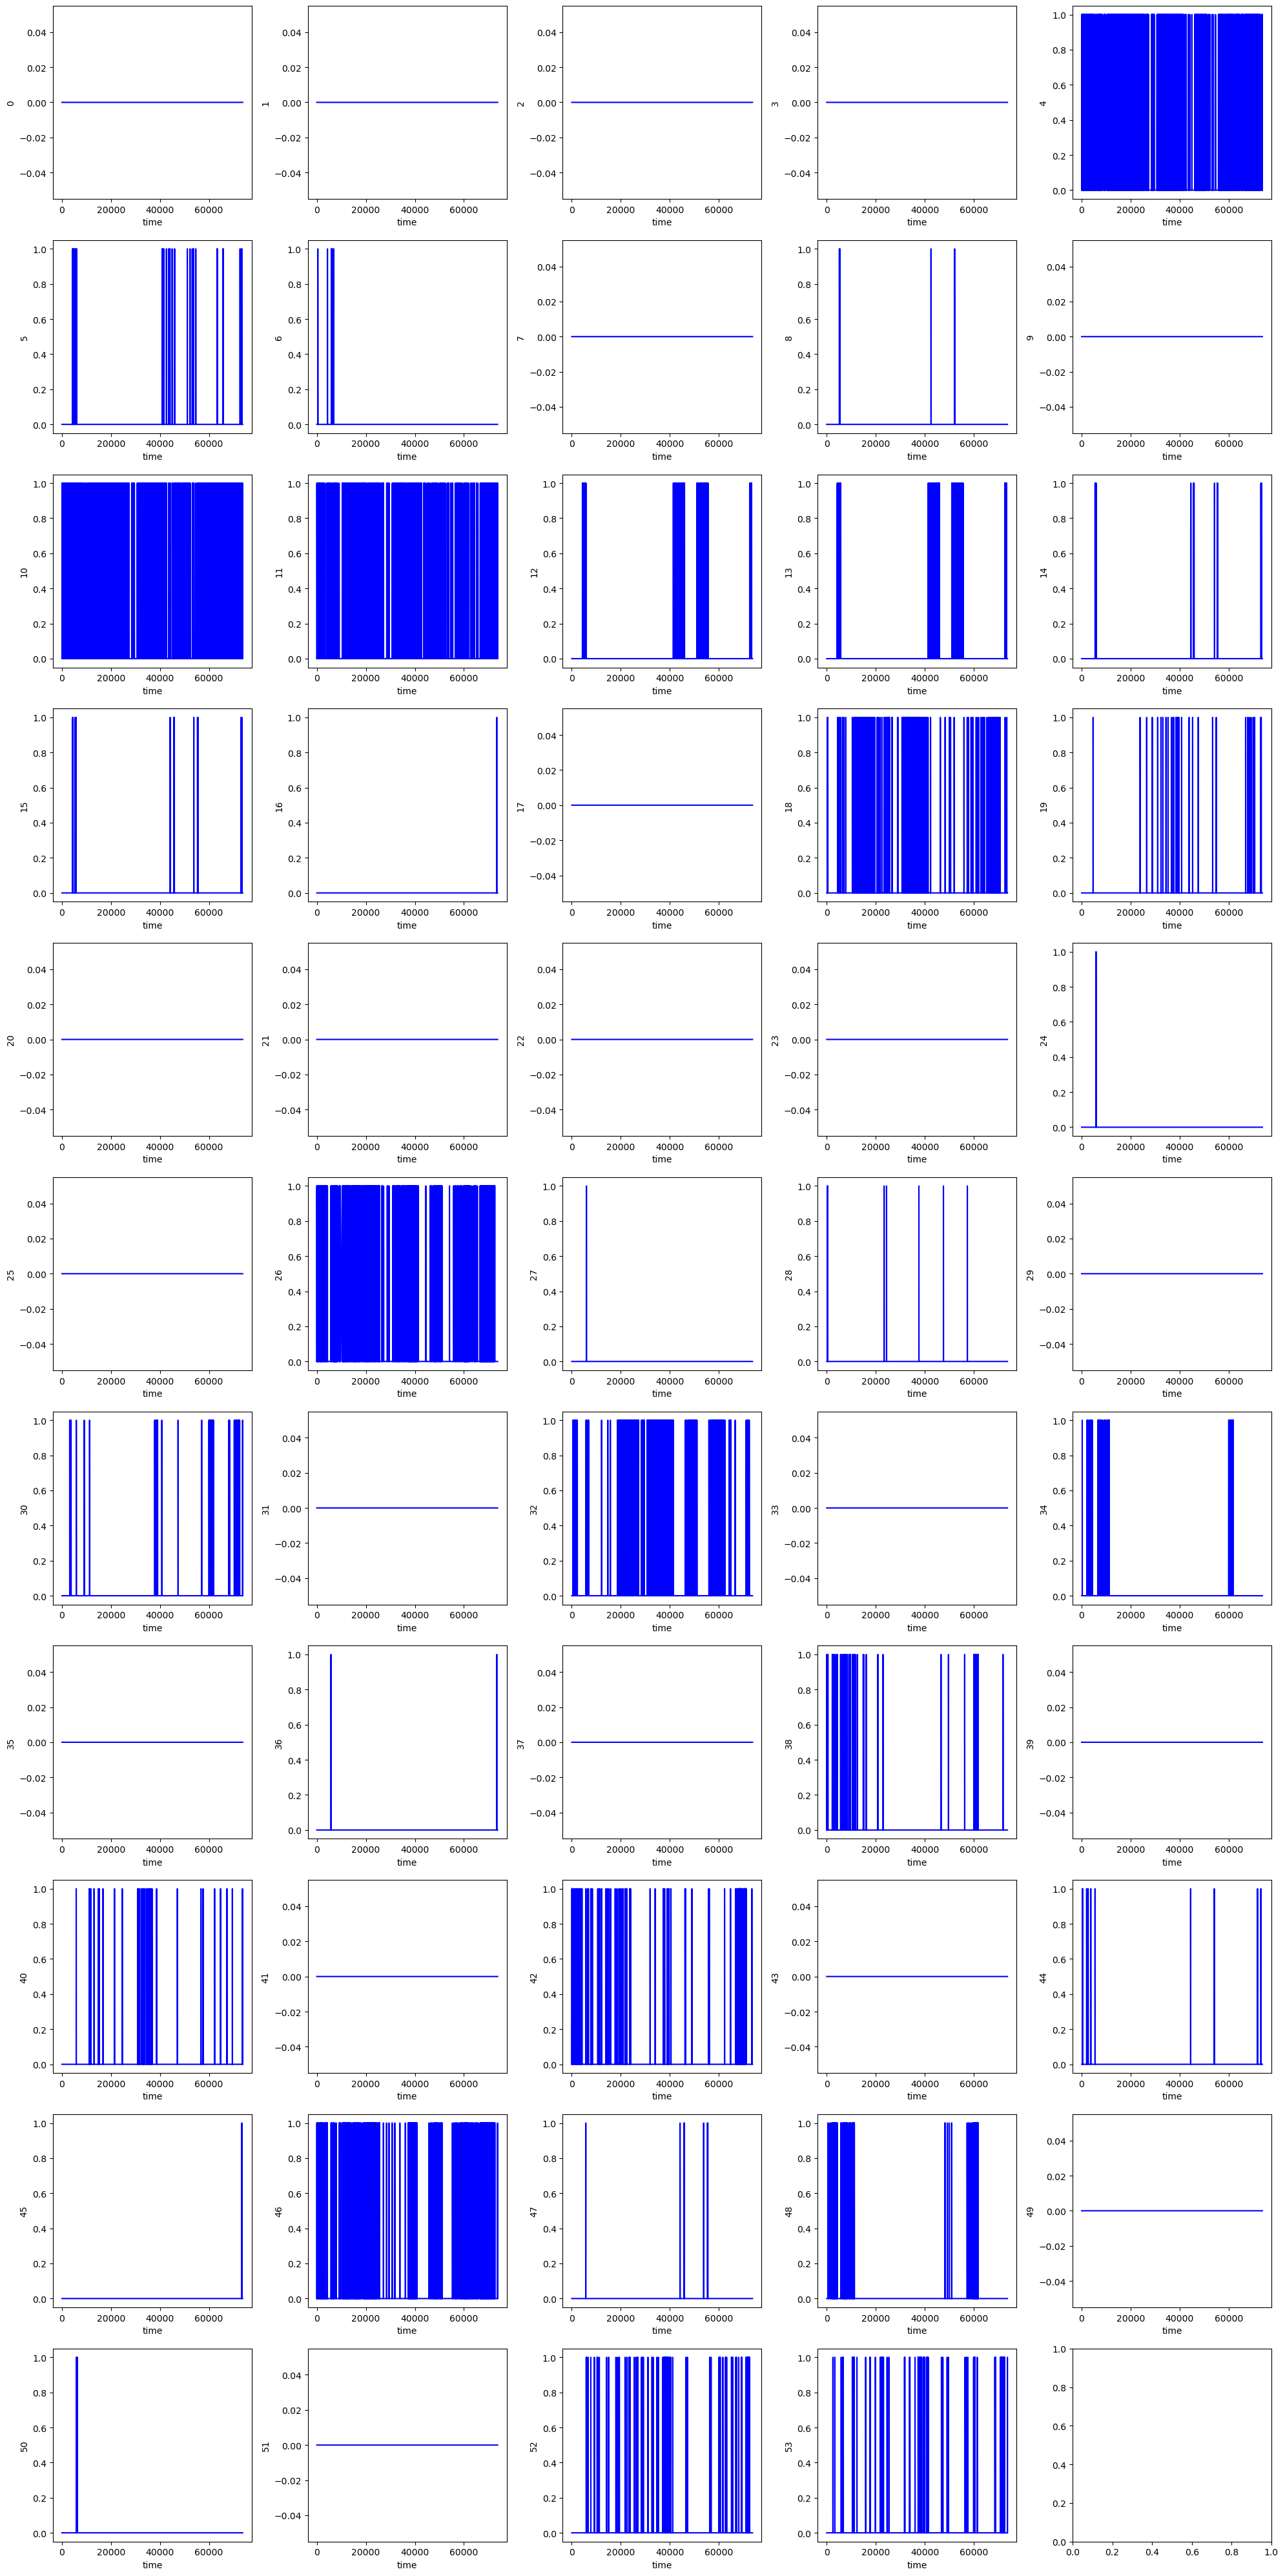

In [56]:
# msl data with anamolies

fig, axes = plt.subplots(11, 5, figsize=(20, 40))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot data on each subplot
for i in range(54):
    ax = axes[i]
    plot = ax.plot(msl_test.index[msl_test_label[msl_test_label["0"]==0].index],msl_test[str(i+1)][msl_test_label[msl_test_label["0"]==0].index],c="blue") # not anomaly
    ax.set_xlabel('time')
    ax.set_ylabel(f'{i}')

    
plt.tight_layout()
plt.show()

3) Perform EDA and find out root cause
4) Find out the variables which are the root cause for the anomaly 



In [34]:
test.head()

0         1         2         3    4         5         6    7         8  \
0  0.0  0.000340  0.000432  0.000000  0.0  0.694290  0.038316  0.0  0.000000   
1  0.0  0.000510  0.000576  0.000000  0.0  0.694702  0.038856  0.0  0.427536   
2  0.0  0.000510  0.000576  0.000000  0.0  0.694908  0.038856  0.0  0.000000   
3  0.0  0.000170  0.000432  0.000000  0.0  0.695114  0.038856  0.0  0.007246   
4  0.0  0.000935  0.000720  0.000336  0.0  0.695733  0.039935  0.0  0.000000   

     9  ...   28    29        30        31   32        33        34        35  \
0  0.0  ...  0.0  0.50  0.036442  0.000000  0.0  0.023256  0.055147  0.055147   
1  0.0  ...  0.0  0.25  0.025862  0.000000  0.0  0.028623  0.040441  0.040441   
2  0.0  ...  0.0  0.25  0.307994  0.013699  0.0  0.026834  0.183824  0.180147   
3  0.0  ...  0.0  0.25  0.026254  0.000000  0.0  0.030411  0.047794  0.047794   
4  0.0  ...  0.0  0.25  0.014107  0.000000  0.0  0.028623  0.033088  0.029412   

    36   37  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 38 columns]

In [35]:
#finding their sizes
test.shape, msl_test.shape, psm_test.shape, smap_test.shape 

((70001, 38), (73729, 55), (87841, 26), (427617, 25))

In [36]:
# Finding missing values 
msl_test.isnull().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
dtype: int64

In [37]:
test.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
dtype: int64

In [38]:
smap_test.isnull().sum()    

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

In [39]:
psm_test.isnull().sum()

timestamp_(min)    0
feature_0          0
feature_1          0
feature_2          0
feature_3          0
feature_4          0
feature_5          0
feature_6          0
feature_7          0
feature_8          0
feature_9          0
feature_10         0
feature_11         0
feature_12         0
feature_13         0
feature_14         0
feature_15         0
feature_16         0
feature_17         0
feature_18         0
feature_19         0
feature_20         0
feature_21         0
feature_22         0
feature_23         0
feature_24         0
dtype: int64

There are no missing values in the datasets

From observing the above plots for each dataset, we can identify the columns that are causing the anamolies 

-------> For the test dataset, the variables that cause the anomalies are: 0,1,2,3,8,9,10,11,12,13,16,17,22,28,29,32

-------> For the smp_test dataset, the variables that cause the anomalies are: 0,10,15,16,23,24

-------> For the psm_test dataset, the variables that cause the anomalies are: 0,1,4,5,10,11,12,13,14,15,19,20,21,22

-------> For the msl_test dataset, the variables that cause the anomalies are: 6,8,16,22,28,36

By removing these variables from the dataset, we can build a better model for time series task.